In [45]:
import pyBigWig
import h5py
import numpy as np
import matplotlib.pyplot as plt
from pyliftover import LiftOver

In [64]:
hg38_to_t2tv1 = LiftOver('/clusterfs/nilah/oberon/genomes/hg38.t2t-chm13-v1.0.over.chain.gz')
t2tv1_to_t2tv1_1 = LiftOver('/clusterfs/nilah/oberon/genomes/v1.0_to_v1.1_rdna_merged.chain')
sequences_bed_path = '/clusterfs/nilah/oberon/datasets/basenji2_human_training/sequences.bed'

In [38]:
records_prefix = '/clusterfs/nilah/oberon/datasets/basenji/cage/tfrs_seq-targets_basenji_test-train-valid_CAGE_'
shah_prefix = '/clusterfs/nilah/oberon/datasets/lamina_association_shah/'
hek_dimelo_prefix = '/clusterfs/nilah/oberon/datasets/cs282a/hek293/'
gm_dimelo_prefix = '/clusterfs/nilah/oberon/datasets/cs282a/gm12878/'
shah_cardiac = 'GSM5669183_CardiacMyocytes_rep1_LB1.bigwig'
shah_liver = 'GSM5669232_Liver_rep1_LB1.bigwig'

In [32]:
chromosome = 'chr2'
start_co = 0
end_co = 200000000

In [6]:
with h5py.File(f'{records_prefix}{chromosome}.h5') as records:
    processed_measurement_array = np.array(records[f'{chromosome}/targets'])
    print(type(processed_measurement_array),processed_measurement_array.shape)

<class 'numpy.ndarray'> (1944972, 638)


In [7]:
# Assuming processed_measurement_array is your NumPy array
max_value = np.max(processed_measurement_array)
min_value = np.min(processed_measurement_array)
mean_value = np.mean(processed_measurement_array)
median_value = np.median(processed_measurement_array)
variance_value = np.var(processed_measurement_array)

print("Maximum Value:", max_value)
print("Minimum Value:", min_value)
print("Mean Value:", mean_value)
print("Median Value:", median_value)
print("Variance:", variance_value)

Maximum Value: 465.75
Minimum Value: 0.0
Mean Value: 0.1717393
Median Value: 0.0
Variance: 19.234829


In [8]:
# Assuming processed_measurement_array is your 2D NumPy array
non_zero_values = processed_measurement_array[processed_measurement_array != 0]

# Now calculate the statistics on the non-zero values
max_value = np.max(non_zero_values)
min_value = np.min(non_zero_values)
mean_value = np.mean(non_zero_values)
median_value = np.median(non_zero_values)
variance_value = np.var(non_zero_values)

print("Maximum Value (excluding zeros):", max_value)
print("Minimum Value (excluding zeros):", min_value)
print("Mean Value (excluding zeros):", mean_value)
print("Median Value (excluding zeros):", median_value)
print("Variance (excluding zeros):", variance_value)

Maximum Value (excluding zeros): 465.75
Minimum Value (excluding zeros): 0.0030002594
Mean Value (excluding zeros): 1.1139401
Median Value (excluding zeros): 0.17614746
Variance (excluding zeros): 123.84977


In [9]:
# Assuming processed_measurement_array is your 2D NumPy array
max_values = [np.max(col[col != 0]) if np.any(col != 0) else np.nan for col in processed_measurement_array.T]
min_values = [np.min(col[col != 0]) if np.any(col != 0) else np.nan for col in processed_measurement_array.T]
mean_values = [np.mean(col[col != 0]) if np.any(col != 0) else np.nan for col in processed_measurement_array.T]
median_values = [np.median(col[col != 0]) if np.any(col != 0) else np.nan for col in processed_measurement_array.T]
variance_values = [np.var(col[col != 0]) if np.any(col != 0) else np.nan for col in processed_measurement_array.T]

print("Maximum Values (excluding zeros):", max_values)
print("Minimum Values (excluding zeros):", min_values)
print("Mean Values (excluding zeros):", mean_values)
print("Median Values (excluding zeros):", median_values)
print("Variance Values (excluding zeros):", variance_values)

Maximum Values (excluding zeros): [409.75, 418.5, 418.5, 412.5, 413.75, 417.5, 415.5, 416.0, 416.5, 420.0, 414.75, 422.0, 413.75, 413.25, 415.25, 410.5, 421.25, 418.0, 418.75, 414.0, 419.0, 409.75, 415.25, 409.75, 419.0, 418.25, 419.25, 418.5, 418.25, 419.0, 418.75, 419.0, 419.75, 419.75, 417.0, 419.25, 418.0, 415.5, 414.5, 422.5, 415.75, 407.0, 409.0, 412.25, 405.25, 410.5, 414.25, 416.75, 405.0, 405.25, 408.0, 415.0, 415.0, 417.25, 415.25, 404.75, 414.0, 416.25, 415.25, 412.75, 416.5, 416.5, 413.5, 411.75, 414.0, 409.5, 417.25, 414.5, 411.5, 413.0, 416.0, 443.5, 447.75, 411.75, 433.75, 414.25, 410.25, 403.25, 410.75, 436.75, 399.0, 439.0, 404.75, 434.5, 435.25, 438.75, 430.5, 426.75, 446.75, 441.0, 443.5, 443.0, 439.0, 433.5, 436.75, 430.25, 442.25, 439.0, 437.5, 441.75, 442.5, 442.75, 436.0, 442.0, 413.0, 431.0, 418.0, 416.25, 419.0, 442.0, 412.0, 440.25, 446.75, 412.25, 413.5, 406.5, 403.75, 411.0, 427.0, 427.0, 429.0, 413.0, 417.25, 415.0, 443.75, 437.75, 440.5, 446.5, 422.75, 446

In [33]:
with pyBigWig.open(shah_prefix+shah_cardiac) as bw:
    contigs = bw.chroms()
#     contig = list(contigs.keys())[0]
    contig_length = contigs[chromosome]
    values = bw.values(chromosome,start_co,end_co)
    cardiac_lmnb1 = np.nan_to_num(np.array(values),-2)

In [34]:
cardiac_chip = np.power(2,cardiac_lmnb1)

In [35]:
print('min',np.min(cardiac_chip),'\nmax',np.max(cardiac_chip),'\nmean',np.mean(cardiac_chip),'\nvariance',np.var(cardiac_chip))

min 0.2411153876017696 
max 6.159914221582921 
mean 1.210298089383462 
variance 0.14089664804242494


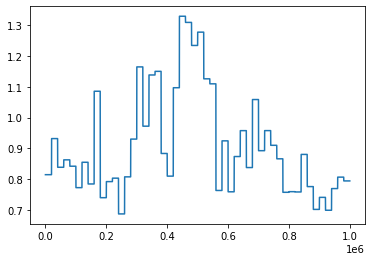

In [37]:
plt.plot(cardiac_chip[100000000:101000000])

In [40]:
with pyBigWig.open(f'{hek_dimelo_prefix}{chromosome}/hek293_dimelo_feb2022_{chromosome}_bigwig_modmA.bw') as bw:
    contigs = bw.chroms()
    contig = list(contigs.keys())[0]
    contig_length = contigs[contig]
    values = bw.values(contig,start_co,end_co)
    dimelo_hek_mod = np.array(values)
with pyBigWig.open(f'{hek_dimelo_prefix}{chromosome}/hek293_dimelo_feb2022_{chromosome}_bigwig_validmA.bw') as bw:
    contigs = bw.chroms()
    contig = list(contigs.keys())[0]
    contig_length = contigs[contig]
    values = bw.values(contig,start_co,end_co)
    dimelo_hek_valid = np.array(values)

In [83]:
def binned_sum_1d(arr, bin_size=128):
    # Truncate the array to make its length a multiple of bin_size
    new_length = arr.shape[0] - arr.shape[0] % bin_size
    truncated_arr = arr[:new_length]

    # Reshape the array for binning
    reshaped_arr = truncated_arr.reshape(new_length // bin_size, bin_size)

    # Perform the binned sum
    binned_sum_arr = reshaped_arr.sum(axis=1)
    return binned_sum_arr

In [84]:
dimelo_hek_mod_binned = binned_sum_1d(dimelo_hek_mod)
dimelo_hek_valid_binned = binned_sum_1d(dimelo_hek_valid)

In [87]:
hek_ratio = np.nan_to_num(dimelo_hek_mod_binned/dimelo_hek_valid_binned)

/tmp/ipykernel_14381/2394025809.py:1: RuntimeWarning: invalid value encountered in true_divide
  hek_ratio = np.nan_to_num(dimelo_hek_mod_binned/dimelo_hek_valid_binned)


In [89]:
print(np.mean(hek_ratio))

4.1909444819240464
